# Passo 1: Importando os módulos necessários

In [3]:
import pandas as pd
import datetime
import yfinance as yf
from matplotlib import pyplot as plt
import mplcyberpunk
import win32com.client as win32

# Passo 2: Pegar dados no Yahoo Finance

In [4]:
codigos_de_negociacao = ["^BVSP", "BRL=X"]  

hoje = datetime.datetime.now()
um_ano_atras = hoje - datetime.timedelta(days = 365)

dados_mercado = yf.download(codigos_de_negociacao, um_ano_atras, hoje)

display(dados_mercado)

[*********************100%***********************]  2 of 2 completed


Adj Close               Close              High            \
               BRL=X     ^BVSP     BRL=X     ^BVSP   BRL=X     ^BVSP   
Date                                                                   
2022-02-08  5.262600  112234.0  5.262600  112234.0  5.2849  112251.0   
2022-02-09  5.258400  112461.0  5.258400  112461.0  5.2880  113163.0   
2022-02-10  5.234500  113359.0  5.234500  113359.0  5.2446  113812.0   
2022-02-11  5.248700  113572.0  5.248700  113572.0  5.2512  114899.0   
2022-02-14  5.249956  113807.0  5.249956  113807.0  5.2633  114167.0   
...              ...       ...       ...       ...     ...       ...   
2023-02-01  5.072200  112303.0  5.072200  112303.0  5.0868  113598.0   
2023-02-02  5.053500  109935.0  5.053500  109935.0  5.0545  112943.0   
2023-02-03  5.049200  108490.0  5.049200  108490.0  5.1347  110570.0   
2023-02-06  5.149800  108456.0  5.149800  108456.0  5.2060  108710.0   
2023-02-07  5.145700  107920.0  5.145700  107920.0  5.2057  109037.0   

                 Low                Open           Volume              
               BRL=X     ^BVSP     BRL=X     ^BVSP  BRL=X       ^BVSP  
Date                                                                   
2022-02-08  5.251000  110943.0  5.262800  111995.0      0  10157500.0  
2022-02-09  5.232774  111710.0  5.256489  112233.0      0  13794500.0  
2022-02-10  5.170000  112163.0  5.231429  112462.0      0  13267900.0  
2022-02-11  5.182800  113128.0  5.248600  113368.0      0  18602800.0  
2022-02-14  5.195300  113358.0  5.250500  113643.0      0  10757600.0  
...              ...       ...       ...       ...    ...         ...  
2023-02-01  5.047900  110729.0  5.072200  113430.0      0  17821500.0  
2023-02-02  4.941700  109747.0  5.053500  112072.0      0  15241800.0  
2023-02-03  5.046758  108185.0  5.049200  110141.0      0  13235300.0  
2023-02-06  5.147992  107416.0  5.149800  108518.0      0  11514600.0  
2023-02-07  5.133384  107234.0  5.145700  108727.0      0  12956300.0  

[261 rows x 12 columns]

# Passo 3.1: Manipulando os dados - seleção e exclusão de dados 

In [5]:
dados_fechamento = dados_mercado['Adj Close']

dados_fechamento.columns = ['dolar', 'ibovespa']

dados_fechamento = dados_fechamento.dropna()

dados_fechamento

,dolar,ibovespa
Date,,
2022-02-08,5.262600,112234.0
2022-02-09,5.258400,112461.0
2022-02-10,5.234500,113359.0
2022-02-11,5.248700,113572.0
2022-02-14,5.249956,113807.0
...,...,...
2023-02-01,5.072200,112303.0
2023-02-02,5.053500,109935.0
2023-02-03,5.049200,108490.0


# Passo 3.2: Manipulando os dados - Criando tabelas com outros timeframes. 

In [6]:
dados_anuais = dados_fechamento.resample("Y").last()

dados_mensais = dados_fechamento.resample("M").last()

dados_anuais

,dolar,ibovespa
Date,,
2022-12-31,5.2668,110031.0
2023-12-31,5.1457,107920.0


# Passo 4 - Calcular fechamento do dia, retorno no ano e retorno no mês dos ativos. 

In [7]:
retorno_anual = dados_anuais.pct_change().dropna()
retorno_mensal = dados_mensais.pct_change().dropna()
retorno_diario = dados_fechamento.pct_change().dropna()

retorno_diario

,dolar,ibovespa
Date,,
2022-02-09,-0.000798,0.002023
2022-02-10,-0.004545,0.007985
2022-02-11,0.002713,0.001879
2022-02-14,0.000239,0.002069
2022-02-15,-0.006849,0.007495
...,...,...
2023-02-01,-0.008348,-0.010825
2023-02-02,-0.003687,-0.021086
2023-02-03,-0.000851,-0.013144


# Passo 5 - Localizar o fechamento do dia anterior, retorno no mês e retorno no ano.

* loc -> referenciar elementos a partir do nome
* iloc -> selecionar elementos como uma matriz

In [17]:
# retorno_jan_26_2022 = retorno_diario.loc['2022-01-26', 'dolar']
# retorno_jan_26_2022_iloc = retorno_diario.iloc[1, 0]

retorno_diario_dolar = retorno_diario.iloc[-1, 0]
retorno_diario_ibov = retorno_diario.iloc[-1, 1]

retorno_mensal_dolar = retorno_mensal.iloc[-1, 0]
retorno_mensal_ibov = retorno_mensal.iloc[-1, 1]

retorno_anual_dolar = retorno_anual.iloc[-1, 0]
retorno_anual_ibov = retorno_anual.iloc[-1, 1]

print(retorno_anual_dolar)
display(retorno_anual)

-0.022993079396810168


,dolar,ibovespa
Date,,
2023-12-31,-0.022993,-0.019186


In [9]:
retorno_diario_dolar = round((retorno_diario_dolar * 100), 2)
retorno_diario_ibov = round((retorno_diario_ibov * 100), 2)

retorno_mensal_dolar = round((retorno_mensal_dolar * 100), 2)
retorno_mensal_ibov = round((retorno_mensal_ibov * 100), 2) 

retorno_anual_dolar = round((retorno_anual_dolar * 100), 2)
retorno_anual_ibov = round((retorno_anual_ibov * 100), 2)

# Passo 6 - Fazer os gráficos da performance do último dos ativos

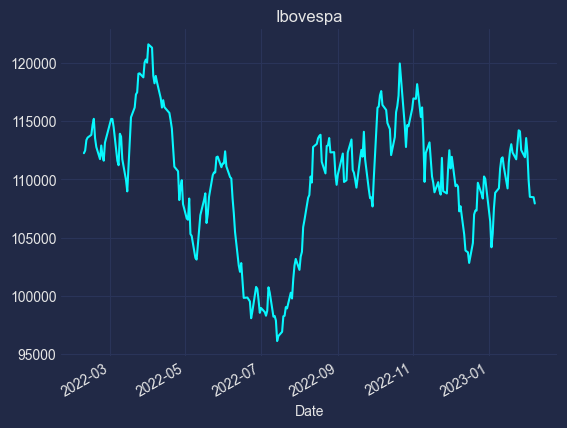

In [15]:
plt.style.use("cyberpunk")

dados_fechamento.plot(y = "ibovespa", use_index = True, legend = False)

plt.title("Ibovespa")

plt.savefig('ibovespa.png', dpi = 300)

plt.show()

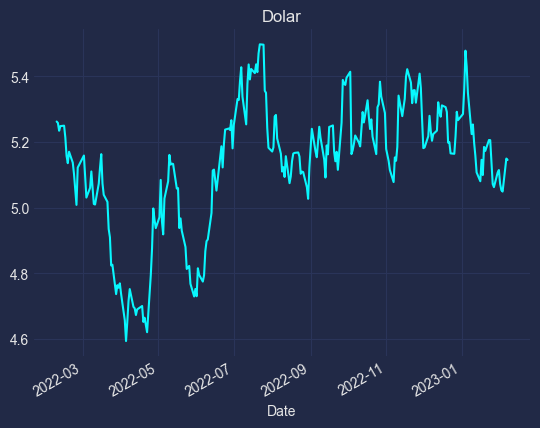

In [16]:
plt.style.use("cyberpunk")

dados_fechamento.plot(y = "dolar", use_index = True, legend = False)

plt.title("Dolar")

plt.savefig('dolar.png', dpi = 300)

plt.show()

# Passo 7: Enviar e-mail

In [12]:
outlook = win32.Dispatch("outlook.application")

email = outlook.CreateItem(0)

In [13]:
email.To = "Email.com para quem enviar"
email.Subject = "Relatório Diário"
email.Body = f'''Prezado diretor, segue o relatório diário:

Bolsa:

No ano o Ibovespa está tendo uma rentabilidade de {retorno_anual_ibov}%, 
enquanto no mês a rentabilidade é de {retorno_mensal_ibov}%.

No último dia útil, o fechamento do Ibovespa foi de {retorno_diario_ibov}%.

Dólar:

No ano o Dólar está tendo uma rentabilidade de {retorno_anual_dolar}%, 
enquanto no mês a rentabilidade é de {retorno_mensal_dolar}%.

No último dia útil, o fechamento do Dólar foi de {retorno_diario_dolar}%.


Abs,

O melhor estagiário do mundo

'''

anexo_ibovespa = r'caminho da imagem salva'
anexo_dolar = r'caminho da imagem salva'

email.Attachments.Add(anexo_ibovespa)
email.Attachments.Add(anexo_dolar)

email.Send()


com_error: (-2147352567, 'Exceção.', (4096, 'Microsoft Outlook', 'O caminho não existe. Verifique se ele está correto.', None, 0, -2147024893), None)